In [1]:
# Импорт библиотек
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from yellowbrick.regressor import PredictionError

import warnings
warnings.filterwarnings('ignore')

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 14,6
plt.style.use('seaborn-talk')

In [3]:
# Загрузка данных
boston_dataset = load_boston()

In [4]:
X = boston_dataset.data # ‘data’ - многомерный массив 506 на 13
y = boston_dataset.target # ‘target’ - многомерный массив с маркером на каждую строку

In [5]:
# Разделение набора данных на тренировочные и тестовые части
test_size = 0.2
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

- X_train и y_train - тренировочные наборы данных
- X_test и y_test – для расчета прогнозных значений. 
- y_test не участвует в расчёте прогноза: с помощью метода ‘score’, подсчитаем правильные ответы с помощью метрики.

In [6]:
# Параметры оценивания
num_folds = 10
n_iter = 1000
n_estimators = 100
scoring = 'r2'# коэффициент детерминации - метрика для оценки: чем ближе к 1,00, тем выше качество

### Проверка на исходных, необработанных данных

Для начала выполним проверку на необработанных данных, чтобы было с чем сравнивать.

In [7]:
model = GradientBoostingRegressor(n_estimators=n_estimators)

In [8]:
kfold = KFold(n_splits=num_folds)
cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=
                                 scoring)
    
m_fit = model.fit(X_train, y_train)
m_predict = model.predict(X_test)
m_score = model.score(X_test, y_test)

GradientBoostingRegressor, необработанные данные
Cредняя оценка 10-кратной перекрёстной проверки на тренировочных данных: 0.881
Cреднее квадратичное отклонение:  0.037
Значение метрики на тестовых данных test =  0.87


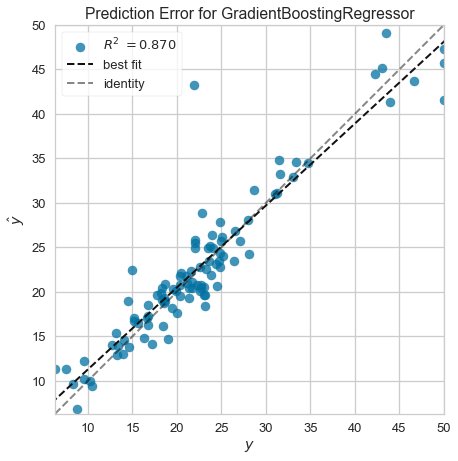

<AxesSubplot:title={'center':'Prediction Error for GradientBoostingRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [9]:
print("GradientBoostingRegressor, необработанные данные")  
print("Cредняя оценка 10-кратной перекрёстной проверки на тренировочных данных:", round(cv_results.mean(), 3)) 
print("Cреднее квадратичное отклонение: ", round(cv_results.std(), 3)) 
print("Значение метрики на тестовых данных test = ", round(m_score, 3))

visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)        
visualizer.show()

GradientBoostingRegressor, необработанные данные
- Cредняя оценка 10-кратной перекрёстной проверки на тренировочных данных: 0.881
- Cреднее квадратичное отклонение:  0.037
- Значение метрики на тестовых данных test =  0.87

### Проверка на предобработанных данных

In [10]:
X[:, :3].mean(axis=0) # Среднее значение первых трех функций

array([ 3.61352356, 11.36363636, 11.13677866])

array([ 3.61352356, 11.36363636, 11.13677866])

In [11]:
X[:, :3].std(axis=0) # Стандартное отклонение первых трех функций

array([ 8.59304135, 23.29939569,  6.85357058])

array([ 8.59304135, 23.29939569,  6.85357058])

Среднее значение первого признака является наименьшим из трех признаков, но его стандартное отклонение больше, чем стандартное отклонение третьего признака. Среднее и стандартное отклонение второго признака являются наибольшими, что указывает на то, что его значения разбросаны.

In [12]:
# Стандартизация данных
# Стандартизация значений характеристик
std_x = StandardScaler()
X_train_SS = std_x.fit_transform(X_train)
X_test_SS = std_x.transform(X_test)

# Стандартизация целевых значений
std_y = StandardScaler()
y_train_SS = std_y.fit_transform(y_train.reshape(-1, 1))
y_test_SS = std_y.transform(y_test.reshape(-1, 1))

In [13]:
kfold = KFold(n_splits=num_folds)
cv_results_SS = cross_val_score(model, X_train_SS, y_train_SS, cv=kfold, scoring=
                                 scoring)
    
m_fit_SS = model.fit(X_train_SS, y_train_SS)
m_predict_SS = model.predict(X_test_SS)
m_score_SS = model.score(X_test_SS, y_test_SS)

GradientBoostingRegressor, стандартизованные данные
Cредняя оценка 10-кратной перекрёстной проверки на тренировочных данных: 0.88
Cреднее квадратичное отклонение:  0.042
Значение метрики на тестовых данных test =  0.872


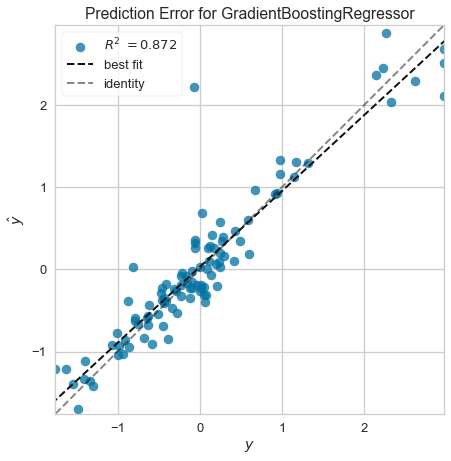

<AxesSubplot:title={'center':'Prediction Error for GradientBoostingRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [14]:
print("GradientBoostingRegressor, стандартизованные данные")  
print("Cредняя оценка 10-кратной перекрёстной проверки на тренировочных данных:", round(cv_results_SS.mean(), 3)) 
print("Cреднее квадратичное отклонение: ", round(cv_results_SS.std(), 3)) 
print("Значение метрики на тестовых данных test = ", round(m_score_SS, 3))

visualizer = PredictionError(model)
visualizer.fit(X_train_SS, y_train_SS)  
visualizer.score(X_test_SS, y_test_SS)        
visualizer.show()

GradientBoostingRegressor, стандартизованные данные
- Cредняя оценка 10-кратной перекрёстной проверки на тренировочных данных: 0.88
- Cреднее квадратичное отклонение:  0.042
- Значение метрики на тестовых данных test =  0.872

Вывод: влияние предобработки (в кач-ве примера использовалась стандартизация) на финальные показатели модели незначительно. 